## Imports

In [9]:
import numpy as np
import pandas as pd
import LabIFSC2 as lab
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 50.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 46.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 48.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 60.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


## Get the raw data

In [2]:
file_path = './luz_pulsada_dados.csv'
def processed_data(file_path):
    data = pd.read_csv(file_path, delimiter='\t')
    data['pos'] = data['pos'] - data['pos'].iloc[0]
    data['freq'] = data['freq']/2
    return data

data = processed_data(file_path)

## Get the mean frequency for each bin of position

In [3]:
mean_freq = data.groupby('pos')['freq'].mean()

In [18]:
positions=np.array([lab.Medida(-distancia,"mm",0) for distancia in mean_freq.index.values])
freqs=np.array([lab.Medida(freq,"Hz",0) for freq in mean_freq.values])


## Gráficos

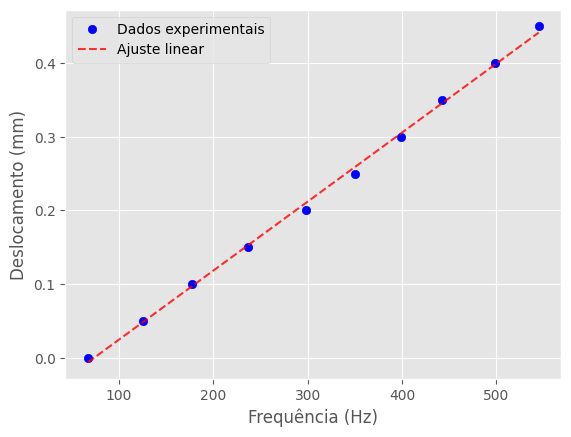

In [ ]:
plt.style.use("ggplot")
unidade_frequencia="Hz"
unidade_distancia="mm"
fig,axis=plt.subplots()
axis.set_xlabel(f"Frequência ({unidade_frequencia})")
axis.set_ylabel(f"Módulo do deslocamento ({unidade_distancia})")
axis.scatter(lab.nominais(freqs,unidade_frequencia),
             lab.nominais(positions,unidade_distancia),
             color="blue",label="Dados experimentais")
reta=lab.regressao_linear(freqs,positions)
x_values=np.linspace(min(lab.nominais(freqs,unidade_frequencia)),
                     max(lab.nominais(freqs,unidade_frequencia)),100)
y=reta.a*lab.arrayM(x_values,unidade_frequencia,0)+reta.b
axis.plot(x_values,lab.nominais(y,unidade_distancia),
          color="red",label="Ajuste linear",alpha=0.8,linestyle="dashed")
axis.legend()



In [ ]:
#print(f"{reta.a:mm/khertz}")
d=lab.Medida(1050,"cm",10) # espelho giratório até E2
R=lab.Medida(514,"cm",10)+lab.Medida(1.5,"m",0.1) # espelho giratório até beam splitter + beam splitter até régua 
c_real=lab.constantes.speed_of_light_in_vacuum
print(f"{c_real*reta.a/(8*lab.constantes.pi):m^2}")
c=(8*lab.constantes.pi*R*d)/reta.a
print(f"{c:km/s}")



(1,12 ± 0,02)x10¹ m²
(5,1 ± 0,2)x10⁵ km/s


$$V=\frac{8\pi R f d}{\Delta s}$$

$$\Delta s=\frac{8\pi R d}{v}f$$

$$\alpha :=\frac{8 \pi R d}{c}$$
$$c=\frac{8\pi R d}{\alpha}$$